In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD


from IPython.display import display

import matplotlib.style as style
style.use("fivethirtyeight")

import sys

In [2]:
dataset = pd.read_csv('./../movies46k_prepro_onehot.csv')

In [3]:
# pd.set_option('display.max_columns', 500)
text_columns = ['movieId','original_title', 'overview', 'title', 'keywords', 'actors', 'characters', 'original_language']
# text_columns = ['release_date', 'original_title', 'overview', 'id', 'tagline', 'title', 'keywords', 'actors', 'characters', 'original_language']
df = dataset.drop(columns=text_columns)
display(pd.DataFrame(df.describe()))


df = StandardScaler().fit_transform(df)
# display(pd.DataFrame(pd.DataFrame(df).describe()))


## PCA (works well with dense data)
# variance_retention = 0.70
# pca = PCA(variance_retention)
# principalComponents = pca.fit_transform(df)
# df = pd.DataFrame(principalComponents)

## LDA works well with sparse data (a lot of zeroes)
svd = TruncatedSVD(n_components=10, algorithm='randomized')
df = svd.fit_transform(df)

display(pd.DataFrame(df))

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,male_count,female_count,undefined_gender_count,...,en,fr,de,es,it,ja,ru,zh,hi,pt
count,4.619500e+04,46195.000000,4.619500e+04,46195.000000,46195.000000,46195.000000,46195.000000,46195.000000,46195.000000,46195.000000,...,46195.000000,46195.000000,46195.000000,46195.000000,46195.000000,46195.000000,46195.000000,46195.000000,46195.000000,46195.000000
mean,4.202242e+06,2.916418,1.112936e+07,93.733348,5.621734,109.125598,1991.998918,4.947094,2.455136,4.971837,...,0.626431,0.091871,0.057257,0.052581,0.051867,0.039333,0.032796,0.017318,0.015759,0.013162
std,1.735038e+07,5.972694,6.409200e+07,38.860291,1.916721,488.580116,24.086896,7.001352,3.115379,5.384510,...,0.483756,0.288847,0.232336,0.223199,0.221761,0.194389,0.178104,0.130454,0.124544,0.113968
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.391506,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,1.130550,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,3.000000,2.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000e+00,3.665938,0.000000e+00,107.000000,6.800000,34.000000,2011.000000,6.000000,3.000000,7.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,175.000000,107.000000,117.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,0,1,2,3,4,5,6,7,8,9
0,9.222308,0.814079,2.807519,2.583877,-2.320360,1.474374,-0.605876,2.499402,-1.791309,0.168518
1,7.225855,0.499886,1.966888,0.232853,-2.729809,-0.092823,0.299058,3.474837,-2.768162,0.394965
2,0.951925,-1.805344,-0.837420,0.940381,-0.834567,-1.470443,-0.730868,-0.093365,0.735127,-0.637699
3,1.710890,-1.457801,-1.129199,0.838333,-0.647551,-2.228602,-0.687054,-0.381999,0.943264,-0.572792
4,1.311401,-1.040779,-0.298856,0.894390,-0.607558,0.120967,-0.638115,0.002422,0.271022,-0.475817
...,...,...,...,...,...,...,...,...,...,...
46190,-0.580296,0.551281,0.152821,0.541069,-0.018566,0.537783,-0.360607,-0.329136,0.083419,-0.053047
46191,0.507854,-1.369004,2.114995,0.616068,-2.327910,-0.335452,-0.606320,1.977979,-0.791152,-0.032038
46192,0.051043,-0.234917,-0.624202,-1.309760,0.404583,-0.314807,0.383157,0.474566,-1.541997,-1.083928
46193,-1.584246,0.255260,0.031833,0.509170,-0.110595,0.315117,-0.300671,-0.349561,0.237576,-0.233876


# Elbow method to determine number of clusters

In [4]:
sse = []
k_range = 30

In [5]:
for k in range(1, k_range):
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

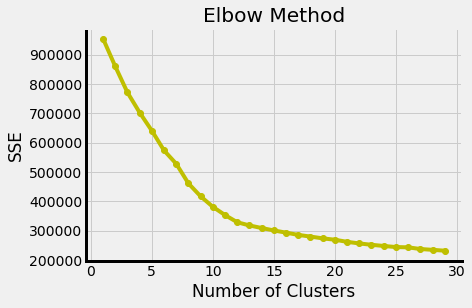

In [6]:
fig, ax = plt.subplots(1)

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')

ax.plot(range(1, k_range), sse, '-o', c = 'y')
ax.xaxis.get_major_locator().set_params(integer=True)
plt.xlabel('Number of Clusters', c = 'black')
plt.ylabel('SSE', c = 'black')
plt.title("Elbow Method", c = 'black')

plt.show()

# Silhouette method to determine number of clusters

In [7]:
silhouette_avg_n_clusters = []

for n_clusters in range(2, k_range):
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df)
    
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_avg_n_clusters.append(silhouette_avg)

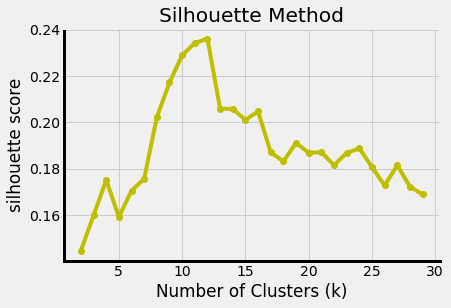

In [8]:
fig, ax = plt.subplots(1)

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')

ax.plot(range(2, k_range), silhouette_avg_n_clusters, '-o', c = 'y')
ax.xaxis.get_major_locator().set_params(integer=True)

plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.title("Silhouette Method", c = 'black')
plt.show()

In [9]:
Kmean = KMeans( algorithm="auto", copy_x=True, init="k-means++", max_iter=300, 
                n_clusters=7, n_init=13, random_state=None, tol=0.0001, verbose=0)

Kmean.fit(df)

KMeans(n_clusters=7, n_init=13)

# Results
* In this baseline model using k_means clustering, which is not the best clustering algorithm, we can see that the optimal number of clusters is 13, combining the results from elbow method and silhouette method.
* We use k_means clustering as the baseline as it is the most standard, simple and basic clustering algorithm.
* Since our data is high dimensional, and k_means clustering fails in high dimensional data due the 'curse of dimensionality', we will now use other clustering algorithms that perform better with high dimensional data.